<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_18_2_Neural_Networks_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Neural Networks**

### **Task 18.2**

Create a classification model based on **neural network** architecture. Teach the model to classify flower species using the **Iris** [set](https://gist.github.com/netj/8836201). Remember that this is a **multi-class classification**, therefore there should be a **Softmax** activation function in the last layer of the network.

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [33]:
# load dataset and review content
iris = pd.read_csv('/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The dataset has **four feature** variables about the flower:

- Sepal length,
- Sepal width,
- Petal length,
- Petal width.

The **target class** is the type of **species**:

- Iris-setosa,
- Iris-versicolor,
- Iris-virginica.

The goal for this task is to build a deep learning model with **tensorflow** to predict the type of species.

### **Preprocessing**

In [34]:
iris.drop(['Id'], axis=1, inplace=True)

Instead of using a label or id to identify each kind of species, we can use one-hot encoding.

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [36]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


For our model we will need to convert data into a numpy array as this is what keras will expect as input.

In [37]:
# convert input to numpy
np_iris = iris.to_numpy()

In [38]:
# separate feature and target variables
X = np_iris[:,0:4]
y = np_iris[:,4]

In [39]:
print("\nFeatures before scaling:\n-------------------------")
print(X[:5,:])
print("\nTarget before scaling:\n-------------------------")
print(y[:5])


Features before scaling:
-------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling:
-------------------------
[0. 0. 0. 0. 0.]


In [40]:
# create s scaler model that is fit on the input data
scaler = StandardScaler().fit(X)

# scale the numeric feature variables
X = scaler.transform(X)

# convert target variable as a one-hot-encoding array
y = tf.keras.utils.to_categorical(y, 3)

In [41]:
print("\nFeatures after scaling:\n-------------------------")
print(X[:5,:])
print("\nTarget after scaling:\n-------------------------")
print(y[:5])


Features after scaling:
-------------------------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]

Target after scaling:
-------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [42]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

print("\nTrain - Test Dimensions:\n---------------------------------")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Train - Test Dimensions:
---------------------------------
(120, 4) (120, 3) (30, 4) (30, 3)


### **Creating a Neural Network Model**
Creating a model in Keras requires defining the following:

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

For our model we will start using Keras' **Sequential method**. This method allows you to build a linear stack of layers, with the output of one layer being the input of the next. The output of the final layer is the output of the model.

Our input layer is of **size four (each feature)**, now we can design the hidden layers. In keras the **Dense** layer type is a fully-connected layer with **n** number of neurons.

For the **first hidden layer**, I have chosen 128 neurons. This gives us a layer total of 128+(128*4) or 640 trainable weights and biases. That is 512 weights 4*128 to each neuron. Plus 16 biases for each neuron.

For the **second hidden layer**, I have chosen also 128 neurons. This gives us a layer total of 128+(128*128) or 16512 trainable weights and biases. That is 16384 weights 128*128 to each neuron. Plus 128 biases for each neuron.


The **third hidden layer** uses three neurons, this will be our **output layer** for the model. Giving us an additional 3+(128*3) or 387 trainable parameters for a total of 17539 trainable parameters in the network.

We also use an activation function that takes the sum of the weights and bias to give our output. The two different activation functions used in this model are used to create different types of outputs depending on the type of layer.

The first activation function:
- **ReLU (rectified linear unit)**, is used in the first layer to create a **non-linear output**, which helps the model to better learn complex patterns in the data.

The second activation function:
- **softmax**, is used in the second layer to create a **probability output**, which allows the model to assign a probability to each of the possible classes.

In [43]:
from tensorflow import keras

# number of classes in the target variable
NB_CLASSES=3

# create a sequencial model in Keras
model = tf.keras.models.Sequential()

# add the first hidden layer
model.add(keras.layers.Dense(128,                    # number of nodes
                             input_shape=(4,),       # number of input variables
                             name='Hidden-Layer-1',  # logical name
                             activation='relu'))     # activation function

# add a second hidden layer
model.add(keras.layers.Dense(128,
                             name='Hidden-Layer-2',
                             activation='relu'))

# add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

# compile the model with loss & metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print the model meta-data
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### **Training and evaluating the Model**

Now we will train the model. We do this by passing in the training data (X_train, y_train), the **batch size (16)**, and the number of **epochs (10)**. We also pass in the validation data (X_val, y_val) so that we can track the model's performance on the validation set as it is trained.

The **batch size** is the **number of samples** we want to process before updating the model's weights and biases. The number of **epochs** is the **number of times the model will go over the entire training dataset**.

Once the model is trained, we can evaluate its performance on the test set.


Training Progress:
------------------------------------
Epoch 1/10
6/6 [==============================] - 0s 16ms/step - loss: 0.1440 - accuracy: 0.9583 - val_loss: 0.1505 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.1371 - accuracy: 0.9479 - val_loss: 0.1407 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1304 - accuracy: 0.9583 - val_loss: 0.1315 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.1222 - accuracy: 0.9688 - val_loss: 0.1231 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 0.1151 - accuracy: 0.9688 - val_loss: 0.1143 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 0.1089 - accuracy: 0.9688 - val_loss: 0.1071 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 13ms/step - loss: 0.1015 - accuracy: 0.9688 - val_loss: 0.10

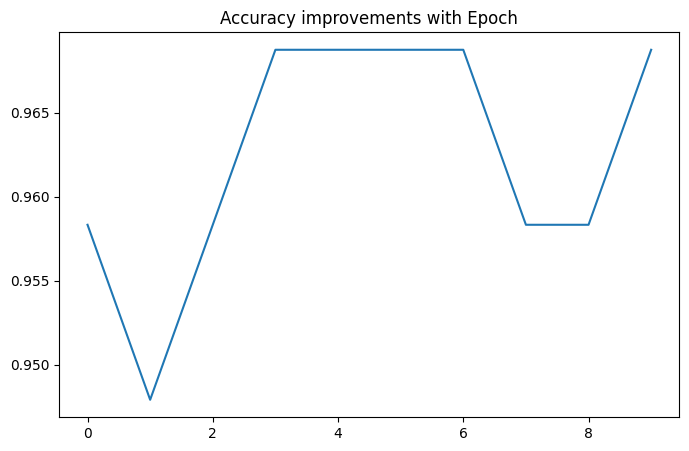


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 28ms/step - loss: 0.1535 - accuracy: 0.9333


[0.15349461138248444, 0.9333333373069763]

In [46]:
# make it verbose so we can see the progress
VERBOSE=1

# setup Hyper Parameters for training

# set Batch size
BATCH_SIZE=16
# set number of epochs
EPOCHS=10
# set validation split. 20% of the training data will be used for validation
# after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

# Fit the model. This will perform the entire training cycle, including
# forward propagation, loss computation, backward propagation and gradient descent.
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch
history=model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

# plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,y_test)

In [49]:
# raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

# scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

# get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

# find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 25ms/step
Raw Prediction Output (Probabilities) : [[0.00634194 0.9072788  0.08637927]]
Prediction is  ['Iris-versicolor']


The model achieved an accuracy above 90% on the test set, which is pretty good for a simple model. For given **prediction_input** data, the model correctly classified the observations as **Iris-versicolor**.